In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('./datasets/walmart_data.csv')

## basic knowledge abt data

# 1. Cheack null values

In [4]:
df.shape

(550068, 10)

In [5]:
total_purchase = df.groupby("User_ID").sum()['Purchase']
num_trans = df.groupby("User_ID").count().iloc[:,0]
avg_purchase_per_tras = total_purchase / num_trans

User_ID
1000001     9545.514286
1000002    10525.610390
1000003    11780.517241
1000004    14747.714286
1000005     7745.292453
               ...     
1006036     8007.894942
1006037     9176.540984
1006038     7502.833333
1006039     7977.283784
1006040     9184.994444
Length: 5891, dtype: float64

In [197]:
df.duplicated().sum()

0

In [20]:
df.groupby("Product_ID")["Purchase"].mean().sort_values(ascending=False)

Product_ID
P00086242    21256.505495
P00085342    20980.268116
P00200642    20468.773234
P00116142    20463.791277
P00119342    20448.756494
                 ...     
P00372445      374.930705
P00375436      374.266585
P00371644      362.911012
P00370853       37.393643
P00370293       36.675159
Name: Purchase, Length: 3631, dtype: float64

In [198]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [199]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

## plan
- check for null + duplicated
    - if null 
        - fillna() OR impute
- fix the data values
- check for class balances / outliers
- feature engineering 
    - removal of the signs 
    - see if there is any relation between the features 
- take care of the cat data 
    - convert to numeric
        - labelencoder
        - onehotencoder --> get_dummies 
- modeling 
    -split the data
    - regression 
- result

# 2. Unique values ---> decision for Encoders

In [200]:
cat_featues = df.select_dtypes(include='object').columns.tolist()
numeric_features = df.select_dtypes(exclude='object').columns.tolist()

In [201]:
cat_featues

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [202]:
numeric_features

['User_ID', 'Occupation', 'Marital_Status', 'Product_Category', 'Purchase']

In [203]:
def num_uniq(category, df):
    data = {}
    for feature in category:
        unique = df[feature].nunique()
        data[feature] = unique
    df_ = pd.DataFrame(data=data, index=[0])
    return df_        

In [204]:
num_uniq(cat_featues, df)

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
0,3631,2,7,3,5


In [205]:
num_uniq(numeric_features,df)

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
0,5891,21,2,20,18105


## WHY its important to check for the unique number ?
bc of the differene in encoding stratgy 
2 calss ---> label encoding -----> less memory/computational usage bc onehot enocoder add so many new features (cols) to the dataset

## takeout 
`Gender` and `City_category` and `Age` ---> `labelEncoder`

In [206]:
df.Stay_In_Current_City_Years.value_counts()

Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64

the data sounds like there is no difference between 4 or above, bc all are in the same category, so lets remove the + for now 

In [207]:
def clean(col, df):
    df[col] = df[col].astype(str).str.replace('+','')
    df[col] = pd.to_numeric(df[col])       

In [208]:
clean('Stay_In_Current_City_Years', df)

In [209]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years     int64
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [210]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [211]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [212]:
df.Age.value_counts()

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

In [213]:
df.groupby(['User_ID', 'Age', 'Gender'])['Purchase'].sum().sort_values(ascending=False)

User_ID  Age    Gender
1004277  36-45  M         10536909
1001680  26-35  M          8699596
1002909  26-35  M          7577756
1001941  36-45  M          6817493
1000424  26-35  M          6573609
                            ...   
1004991  55+    F            52371
1005117  26-35  F            49668
1003883  51-55  M            49349
1000094  26-35  M            49288
1004464  51-55  F            46681
Name: Purchase, Length: 5891, dtype: int64

In [214]:
df.Gender.value_counts()

Gender
M    414259
F    135809
Name: count, dtype: int64

# 3. Data Visualization 
## 3.1. Categorical data

In [215]:
cat_fz = df.select_dtypes(include='object').columns.tolist()

In [327]:
a = df.groupby(['Gender', 'Age'])['Purchase'].sum().sort_values(ascending=False) #series

In [328]:
b = df.groupby(['Gender', 'Age'])[['Purchase']].sum().sort_values(by='Purchase') #dataframe

In [217]:
cat_fz.remove('Product_ID')

In [221]:
cat_fz

['Gender', 'Age', 'City_Category']

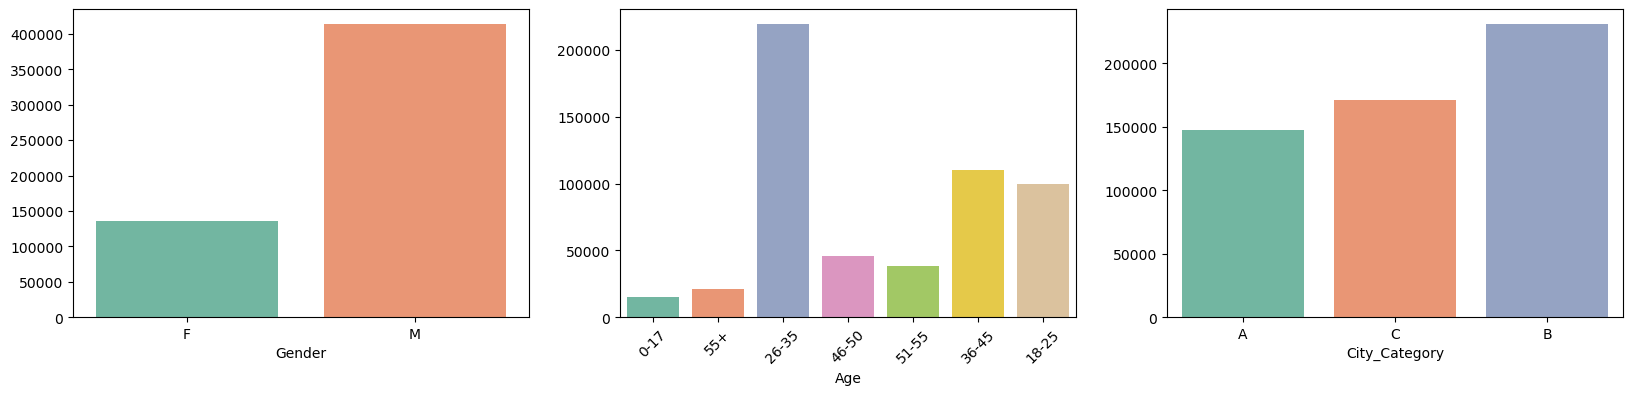

In [285]:
plot, axes = plt.subplots(1,3, figsize=(20,4))

for i, feature in enumerate(cat_fz):
    sns.countplot(data=df, x=feature, ax=axes[i], palette='Set2')
    axes[1].set_xticklabels(labels=axes[1].get_xticklabels(), rotation=45)
    axes[i].set_ylabel('')    

## 2 by 2 cat visualization 

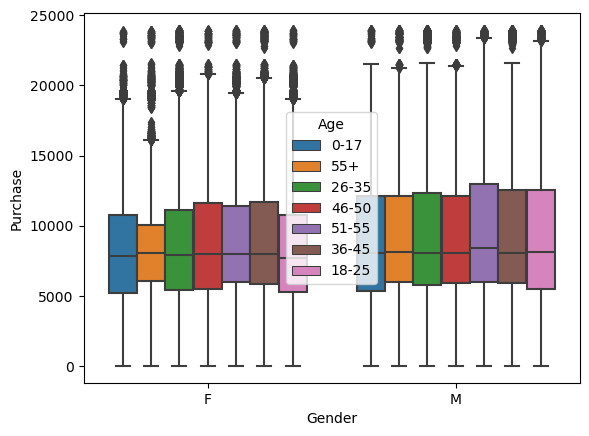

In [288]:
sns.boxplot(data=df, x=df['Gender'], y=df['Purchase'], hue=df['Age'])
plt.show()

In [306]:
f_gender = df[df.Gender == 'F'].Age.value_counts() #felmale purchase

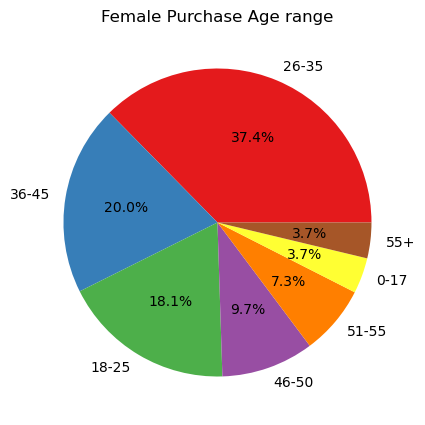

In [313]:
fig, ax = plt.subplots(figsize=(5,5))
plt.pie(x=f_gender, labels=f_gender.index, colors=sns.set_palette('Set1'), autopct='%.1f%%')
plt.title('Female Purchase Age range')
plt.show()


## Takeout
- we have a very inbalaced data in the `Gender` feature. the Male are roughly more than 3 times females
- the biggest shopping range age in ladies are 26-35

## 3.2) Numeric Features

In [239]:
numeric = df.select_dtypes(exclude='object').columns.tolist()

In [241]:
numeric.remove('User_ID')

In [247]:
numeric

['Occupation',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category',
 'Purchase']

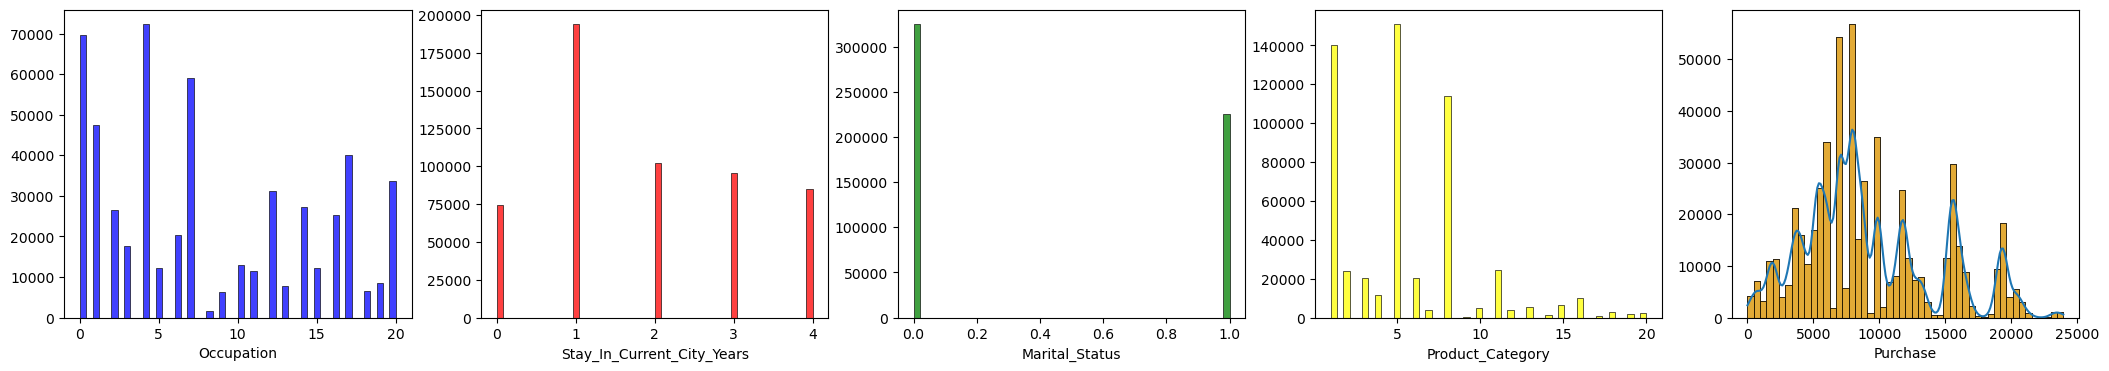

In [283]:
plot, axs = plt.subplots(1,5, figsize=(26,4))
axs = axs.flatten()
for i, feature in enumerate(numeric):
    colors = ['blue', 'red', 'green', 'yellow', 'orange']
    if i == 4:
        sns.histplot(data=df, x=feature, ax=axs[i], bins=50, kde=True)
    sns.histplot(data=df, x=feature, ax=axs[i], bins=50, color=colors[i % len(colors)])
    axs[i].set_ylabel('')
    

In [271]:
df.Purchase.skew()

0.6001400037087128

In [277]:
df.Purchase.describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

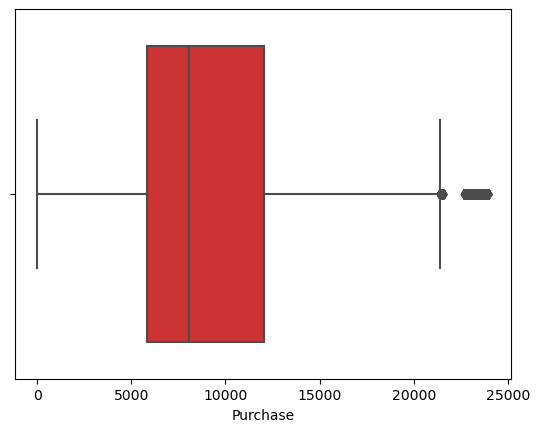

In [349]:
sns.boxplot(data=df, x=df['Purchase'])
plt.show()

## Takeouts
- sounds like in purchase we have outlier looking at the mean of it and the max
- majority of the dataset are single and they tend to shop more than the married 

# Data prep for modeling 

In [350]:
cat_featues = df.select_dtypes(include='object').columns.tolist()
numeric_features = df.select_dtypes(exclude='object').columns.tolist()

In [352]:
cat_featues.remove('Gender')

In [353]:
cat_featues

['Product_ID', 'Age', 'City_Category']

In [364]:
val_counts = {}
for i,feature in enumerate(cat_featues):
    val_counts[feature[i]] = df[feature].value_counts()
    
    

In [379]:
df.groupby('Product_ID')['Product_Category'].unique()

Product_ID
P00000142    [3]
P00000242    [2]
P00000342    [5]
P00000442    [5]
P00000542    [5]
            ... 
P0099442     [6]
P0099642     [8]
P0099742     [3]
P0099842     [5]
P0099942     [5]
Name: Product_Category, Length: 3631, dtype: object

In [ ]:
a = df.groupby(['Gender', 'Age'])['Purchase'].sum().sort_values(ascending=False) #series

In [381]:
# Group by Product_ID and concatenate the unique Product_Category values
product_id_category = df.groupby('Product_ID')['Product_Category'].apply(lambda x: ','.join(x.astype(str).unique())).reset_index()

product_id_category

,Product_ID,Product_Category
0,P00000142,3
1,P00000242,2
2,P00000342,5
3,P00000442,5
4,P00000542,5
...,...,...
3626,P0099442,6
3627,P0099642,8
3628,P0099742,3
3629,P0099842,5


In [384]:
df.Product_ID.nunique()

3631

In [385]:
df.Product_ID.value_counts()

Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: count, Length: 3631, dtype: int64

In [387]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871
